In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

plt.style.use('seaborn')

In [20]:
# training_set = 'training_set'
# val_set = 'val_set'
directories = ['data/GH010951_f', 'data/GH010952_f', 'data/GH010953_f', 'data/GH010954_f', 'data/GH010955', 'data/GH010956', 'data/GH011007', 'data/GH011008']
classes = [element.rstrip() for element in open('data/classes.txt', 'r').readlines()]

In [21]:
def read_files(links):
    labels = []
    
    for link in links:
        if link.endswith('classes.txt'):
            continue
        
        img_link = link.split('.')[0] + '.jpg'
        (height, width, _) = cv2.imread(img_link).shape
        
        lines = open(link, 'r').readlines()
        
        for index, line in enumerate(lines):
            values = line.split(' ')
            lb_width = int(float(values[3]) * width)
            lb_height = int(float(values[4]) * height)
            
            labels.append([
                classes[int(values[0])],
                int(float(values[1]) * width),
                int(float(values[2]) * height),
                lb_width,
                lb_height,
                lb_width * lb_height,
                img_link,
                index,
            ])
            
    if len(labels) == 0:
        return pd.DataFrame({
            'class': [],
            'x': [],
            'y': [],
            'w': [],
            'h': [],
            'area': [],
            'link': [],
        })
    
    labels = np.array(labels)
    
    return pd.DataFrame({
        'class': labels[:, 0],
        'x': labels[:, 1].astype(int),
        'y': labels[:, 2].astype(int),
        'w': labels[:, 3].astype(int),
        'h': labels[:, 4].astype(int),
        'area': labels[:, 5].astype(int),
        'link': labels[:, 6],
        'index': labels[:, 7].astype(int),
    })

In [27]:
total_labels = []

for directory in directories:
    total_labels.append(
        read_files(glob.glob('{}/*.txt'.format(directory)))
    )
    
total_labels = pd.concat(total_labels)

# training_labels = read_files(glob.glob('{}/*.txt'.format(training_set)))
# val_labels = read_files(glob.glob('{}/*.txt'.format(val_set)))
# total_labels = pd.concat([training_labels, val_labels])

/Users/tailtq/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [28]:
def visualize(labels):
    size = labels.groupby('class').size()
    classes = size.index.tolist()
    total = size.values.tolist()
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.bar(classes, total)
    ax.tick_params(labelsize=15)
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.pie(total, labels=classes, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
    plt.show()
    # read all files
    # plot piechart + barchart
    
# entirely remove the small objects (should backup first)
def remove_small_objects(df, comparing_column, threshold):
    group_labels = df.iloc[lambda e: e[comparing_column].values < threshold].groupby('link')
    
    for link, labels in group_labels:
        txt_link = link.split('.')[0] + '.txt'
        lines = open(txt_link, 'r').readlines()
        f = open(txt_link, 'w')
        
        for index, row in labels.iterrows():
            lines[int(row['index'])] = ''
            
        f.write(''.join(list(filter(lambda x: x != '', lines))))
        f.close()

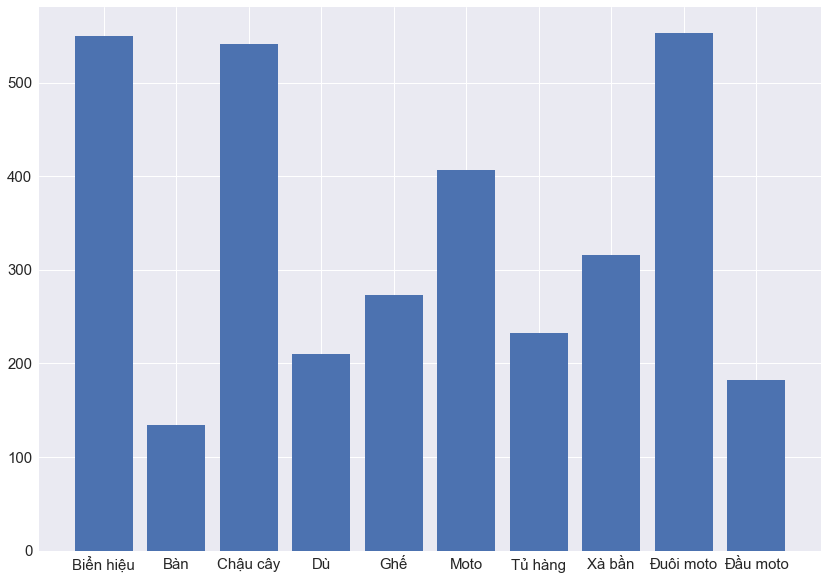

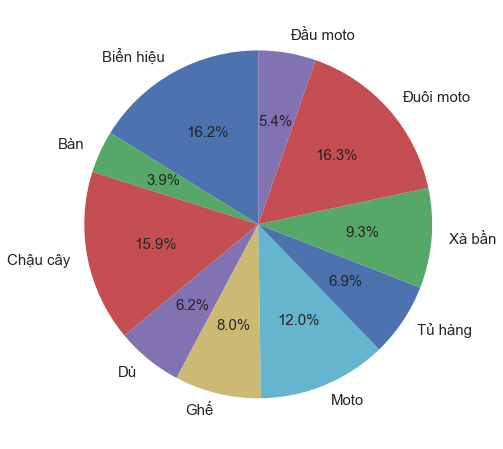

In [29]:
visualize(total_labels)

In [7]:
pd.set_option('display.max_rows', 500)

In [26]:
remove_small_objects(total_labels, 'area', 1600)

In [30]:
total_labels.iloc[lambda e: e['area'].values < 1600]['class'].value_counts()

Series([], Name: class, dtype: int64)

In [31]:
len(total_labels)

3399